# Stock Prices Prediction Using Keras Long Term Short Memory

In [62]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
# Importing the training set
dataset_train = pd.read_csv('./data/machine_usage.csv',error_bad_lines=False, sep ="\t")
training_set = dataset_train.iloc[:, 2:3].values
training_set.shape
# training_set

(10320, 1)

In [64]:
dataset_train.head()

,machine_id,time_stamp,cpu_util_percent,mem_util_percent,Unnamed: 4,Unnamed: 5,mem_gps,mkpi,net_in
0,m_1932,386640,41,92,NaN,NaN,43.04,33.08,5
1,m_1932,386670,43,92,NaN,NaN,43.04,33.08,5
2,m_1932,386690,44,92,NaN,NaN,43.05,33.08,5
3,m_1932,386800,46,92,NaN,NaN,43.05,33.08,3
4,m_1932,386930,44,93,NaN,NaN,43.05,33.09,4


In [66]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

/home/gaoziqiang/device/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 10320):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [68]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [69]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [70]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [71]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [72]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [73]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [74]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
321/321 [==============================] - 17s 42ms/step - loss: 0.0058
Epoch 2/100
321/321 [==============================] - 14s 42ms/step - loss: 0.0041
Epoch 3/100
321/321 [==============================] - 14s 42ms/step - loss: 0.0035
Epoch 4/100
321/321 [==============================] - 14s 44ms/step - loss: 0.0034
Epoch 5/100
321/321 [==============================] - 14s 42ms/step - loss: 0.0031
Epoch 6/100
321/321 [==============================] - 14s 43ms/step - loss: 0.0030
Epoch 7/100
321/321 [==============================] - 14s 43ms/step - loss: 0.0029
Epoch 8/100
321/321 [==============================] - 15s 46ms/step - loss: 0.0026
Epoch 9/100
321/321 [==============================] - 14s 44ms/step - loss: 0.0026
Epoch 10/100
321/321 [==============================] - 14s 44ms/step - loss: 0.0024
Epoch 11/100
321/321 [==============================] - 14s 44ms/step - loss: 0.0025
Epoch 12/100
321/321 [==============================] - 15s 46ms/step - lo

321/321 [==============================] - 13s 42ms/step - loss: 0.0021
Epoch 98/100
321/321 [==============================] - 14s 42ms/step - loss: 0.0020
Epoch 99/100
321/321 [==============================] - 14s 42ms/step - loss: 0.0020
Epoch 100/100
321/321 [==============================] - 13s 42ms/step - loss: 0.0021


In [75]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('./data/test.csv',error_bad_lines=False, sep ="\t")
# dataset_test = pd.read_csv('data/test.csv', error_bad_lines=False, sep ="\t")
real_stock_price = dataset_test.iloc[:, 2:3].values
real_stock_price.shape
dataset_test.head()

,machine_id,time_stamp,cpu_util_percent,mem_util_percent,Unnamed: 4,Unnamed: 5,mem_gps,mkpi,net_in
0,m_1932,387200,46,93,NaN,NaN,43.05,33.09,3
1,m_1932,387530,46,93,NaN,NaN,43.06,33.10,5
2,m_1932,387610,73,97,NaN,NaN,43.06,33.10,7
3,m_1932,387690,75,97,NaN,NaN,43.06,33.10,5
4,m_1932,387840,68,96,NaN,NaN,43.07,33.10,3


In [76]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['cpu_util_percent'], dataset_test['cpu_util_percent']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 71):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

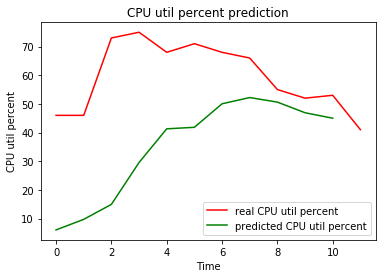

In [77]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'real CPU util percent')
plt.plot(predicted_stock_price, color = 'green', label = 'predicted CPU util percent')
plt.title('CPU util percent prediction')
plt.xlabel('Time')
plt.ylabel('CPU util percent')
plt.legend()
plt.show()